#Part A - EXPLORATORY DATA ANALYSIS

# STEP-1  IMPORTING NECESSARY LIBRARIES

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#INTIAL DATA INSPECTION


*   df.head()
*   df.tail()
*   df.info()
*   df.describe.()
* df.isnull().sum()




In [71]:


# Load the dataset
file_path = '/content/Student_performance_10k.csv'
df = pd.read_csv(file_path)




In [72]:
# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2        

In [73]:
print("\nLast 5 rows of the dataset:")
print(df.tail())





Last 5 rows of the dataset:
        roll_no  gender race_ethnicity parental_level_of_education  lunch  \
9995   std-9996  female        group C                some college    1.0   
9996   std-9997  female        group C           bachelor's degree    1.0   
9997   std-9998  female        group B          associate's degree    1.0   
9998   std-9999  female        group B            some high school    1.0   
9999  std-10000  female        group B                 high school    1.0   

      test_preparation_course math_score  reading_score  writing_score  \
9995                      0.0         78           60.0           46.0   
9996                      0.0         37           92.0           99.0   
9997                      1.0         70           71.0          100.0   
9998                      0.0         87           60.0          100.0   
9999                      0.0         31           89.0           93.0   

      science_score  total_score grade  
9995           58.0   

In [74]:
print("\nDataset Information:")
df.info()




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [75]:
print("\nSummary Statistics:")
print(df.describe())




Summary Statistics:
             lunch  test_preparation_course  reading_score  writing_score  \
count  9976.000000              9977.000000    9975.000000    9976.000000   
mean      0.644246                 0.388694      70.125915      71.415798   
std       0.478765                 0.487478      19.026245      18.245360   
min       0.000000                 0.000000      17.000000      10.000000   
25%       0.000000                 0.000000      57.000000      59.000000   
50%       1.000000                 0.000000      71.000000      72.500000   
75%       1.000000                 1.000000      85.000000      85.000000   
max       1.000000                 1.000000     100.000000     100.000000   

       science_score  total_score  
count    9977.000000  9981.000000  
mean       66.063045   264.740908  
std        19.324331    42.304858  
min         9.000000    89.000000  
25%        53.000000   237.000000  
50%        67.000000   268.000000  
75%        81.000000   294.000000

In [76]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


# STEP-2
# Data Cleaning


# Filling missing values for categorical columns

In [77]:

categorical_columns = ["gender", "race_ethnicity", "parental_level_of_education", "grade"]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns After Cleaning:")
print(categorical_columns)




Categorical Columns After Cleaning:
['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education', 'math_score', 'grade']


# Filling missing values for numeric columns

In [78]:

numeric_columns = ["lunch", "test_preparation_course", "reading_score",
                   "writing_score", "science_score", "total_score"]
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())


numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("\nNumerical Columns After Cleaning:")
print(numerical_columns)




Numerical Columns After Cleaning:
['lunch', 'test_preparation_course', 'reading_score', 'writing_score', 'science_score', 'total_score']


# Convert math_score to numeric if needed and fill missing values

In [79]:

df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())

# Check for remaining missing values

In [80]:

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
roll_no                        1
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


#STEP-3
#DATA VISULAISATIONS

#  Gender Distribution

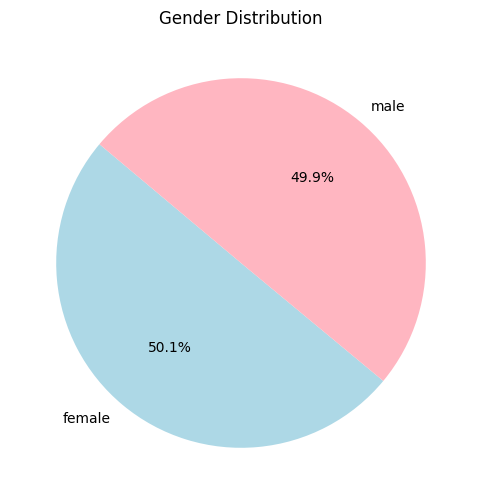

In [81]:
# Clean the gender column to remove invalid entries
df['gender'] = df['gender'].str.strip().str.lower()
df = df[df['gender'].isin(['male', 'female'])]

# Gender Distribution (Pie Chart)
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'lightpink']
)
plt.title("Gender Distribution")
plt.show()


#  Parental Education vs Average Total Score

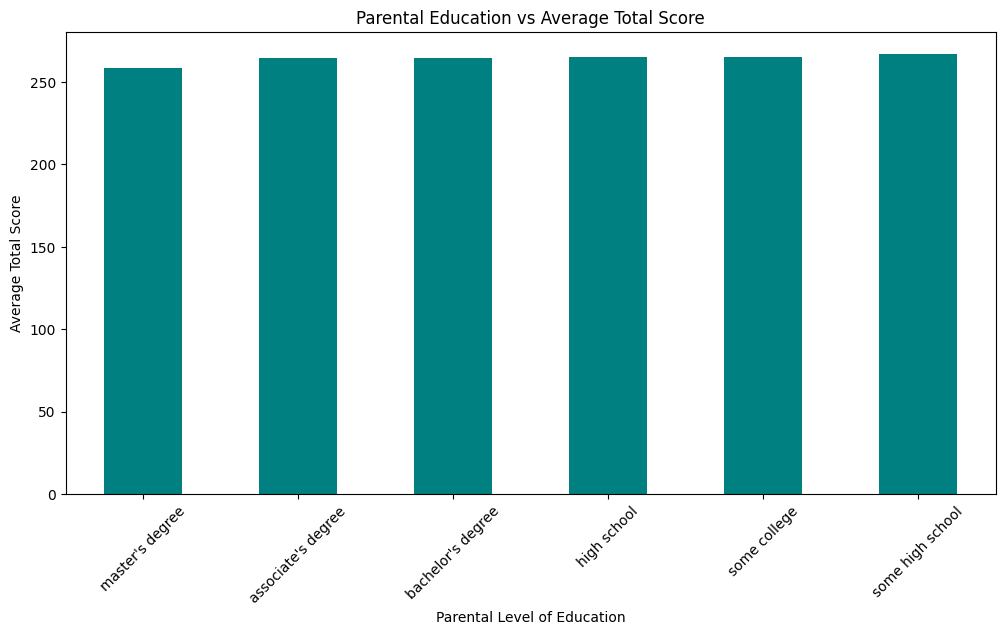

In [82]:

plt.figure(figsize=(12, 6))
avg_scores = df.groupby('parental_level_of_education')['total_score'].mean().sort_values()
avg_scores.plot(kind='bar', color='teal')
plt.title("Parental Education vs Average Total Score")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Total Score")
plt.xticks(rotation=45)
plt.show()

# Total Score Distribution

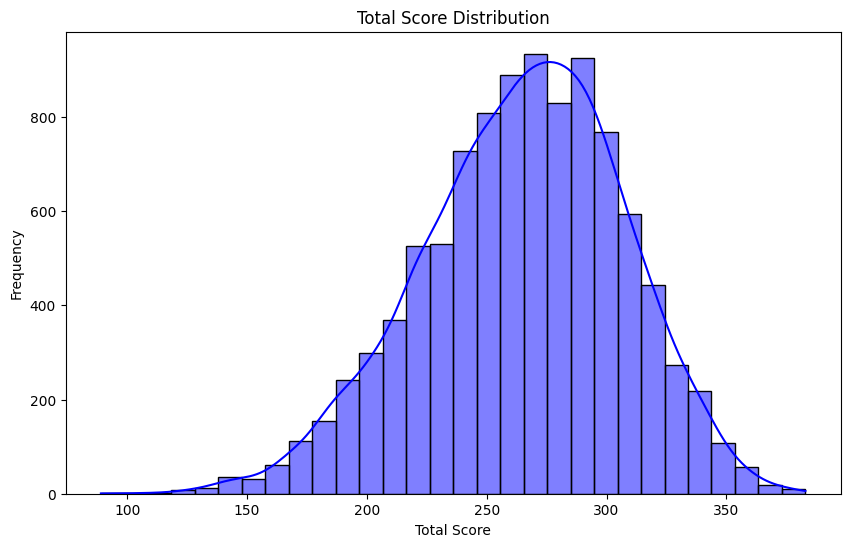

In [83]:

plt.figure(figsize=(10, 6))
sns.histplot(df['total_score'], kde=True, bins=30, color='blue')
plt.title("Total Score Distribution")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()



#  Distribution of Math Scores

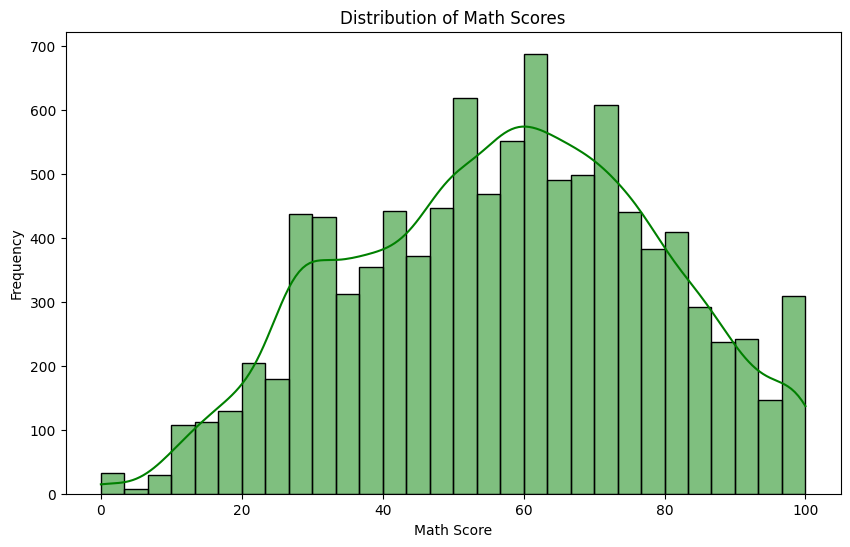

In [84]:

plt.figure(figsize=(10, 6))
sns.histplot(df['math_score'], kde=True, bins=30, color='green')
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()



#  Distribution of Reading Scores

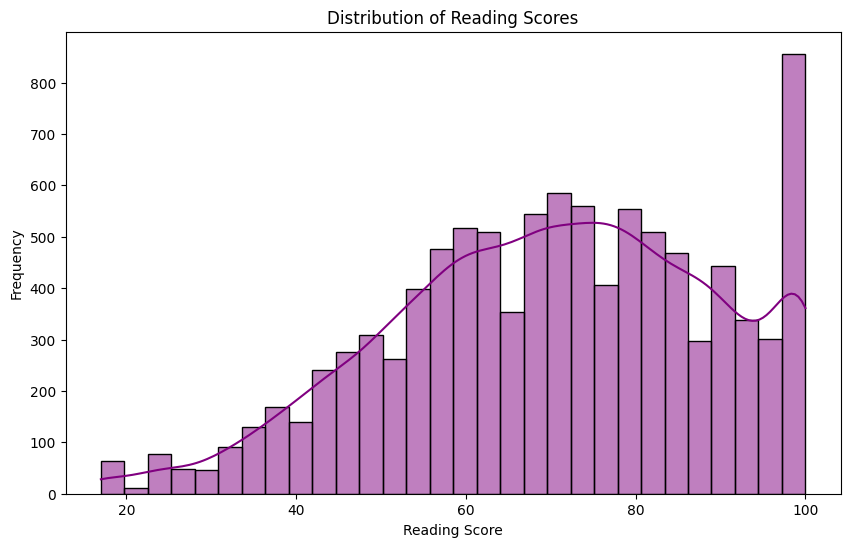

In [85]:

plt.figure(figsize=(10, 6))
sns.histplot(df['reading_score'], kde=True, bins=30, color='purple')
plt.title("Distribution of Reading Scores")
plt.xlabel("Reading Score")
plt.ylabel("Frequency")
plt.show()





#  Distribution of Writing Scores

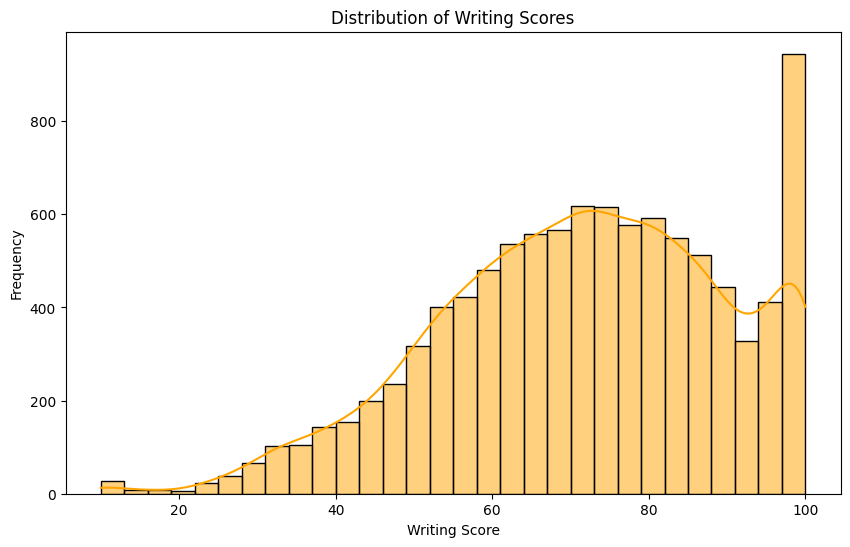

In [86]:

plt.figure(figsize=(10, 6))
sns.histplot(df['writing_score'], kde=True, bins=30, color='orange')
plt.title("Distribution of Writing Scores")
plt.xlabel("Writing Score")
plt.ylabel("Frequency")
plt.show()




#  Test Preparation Course vs Total Score

<ipython-input-87-f73767e4c617>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_preparation_course', y='total_score', data=df, palette='pastel')


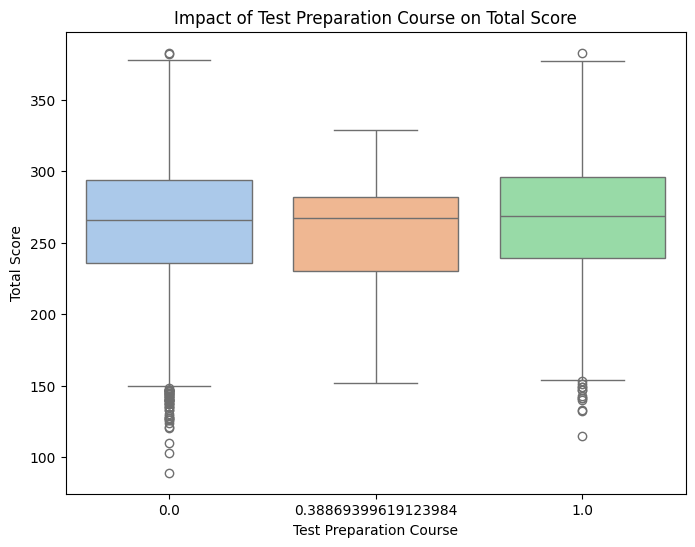

In [87]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='test_preparation_course', y='total_score', data=df, palette='pastel')
plt.title("Impact of Test Preparation Course on Total Score")
plt.xlabel("Test Preparation Course")
plt.ylabel("Total Score")
plt.show()

#  Average Scores by Lunch Type

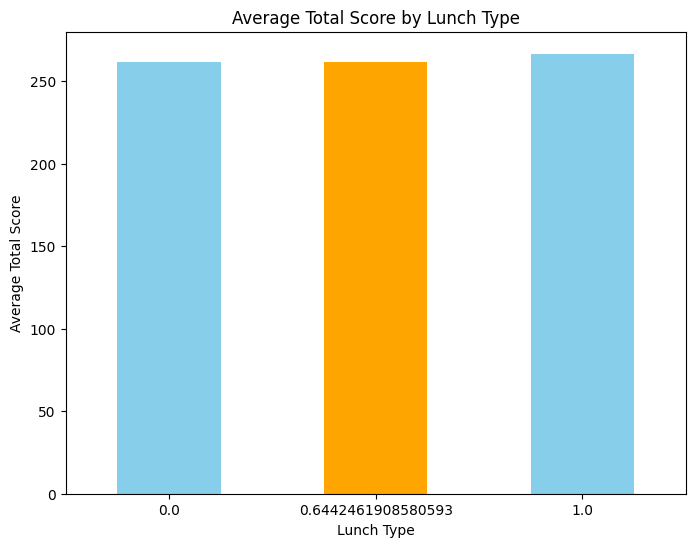

In [88]:

lunch_scores = df.groupby('lunch')['total_score'].mean()
plt.figure(figsize=(8, 6))
lunch_scores.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Average Total Score by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Total Score")
plt.xticks(rotation=0)
plt.show()

#  Score Distributions by Grade

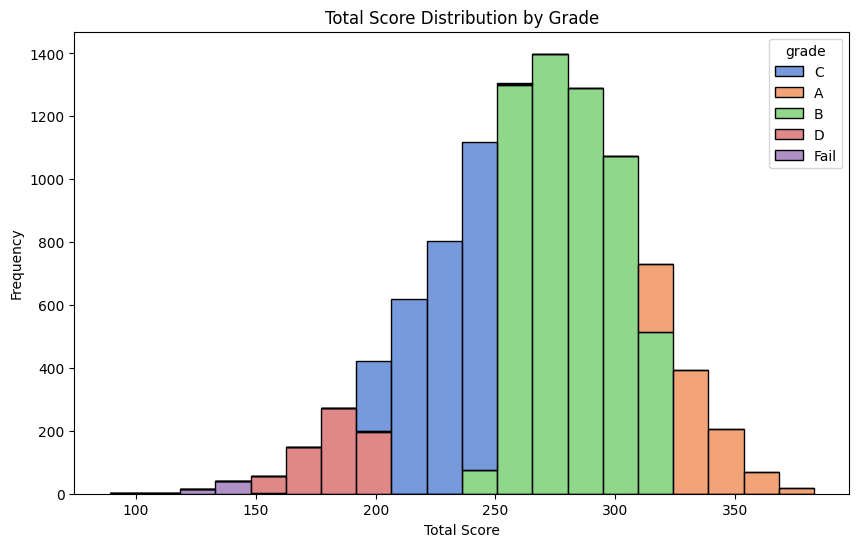

In [89]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_score', hue='grade', multiple='stack', palette='muted', bins=20)
plt.title("Total Score Distribution by Grade")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

#  Total Score Distribution Grouped by Gender

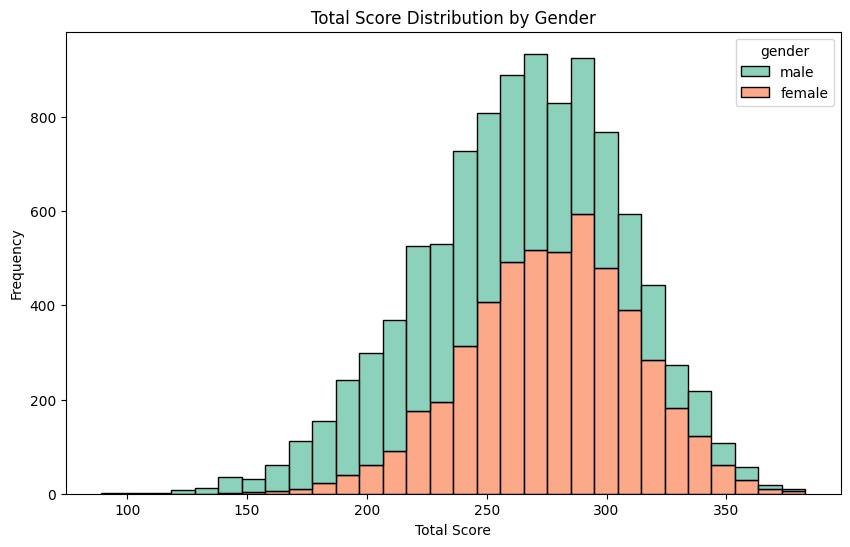

In [90]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_score', hue='gender', multiple='stack', bins=30, palette='Set2')
plt.title("Total Score Distribution by Gender")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

#  Correlation Heatmap

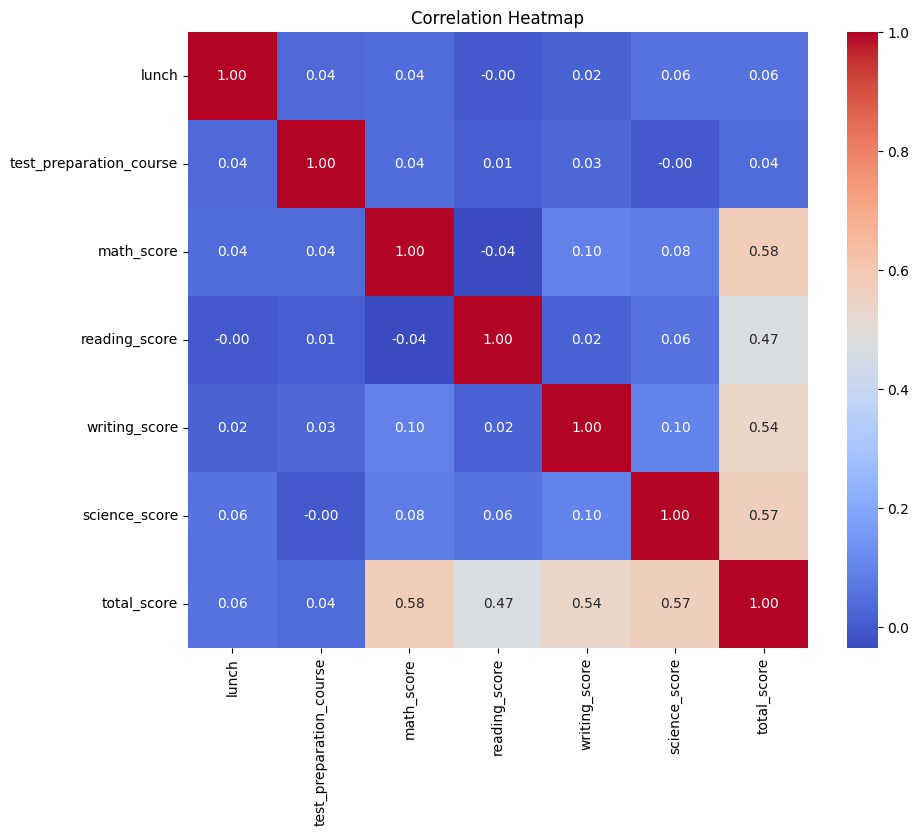

In [91]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Generate and plot the correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()  # Use only numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#PART-B

# Machine learning techniques (Linear Regression, Logistic Regression, Decision Tree, and Random Forest)

#Linear regression  also predicts in  continuous outcomes

# Decision Tree and Random Forest support both regression and classification tasks. This combination is typically used when the primary focus is on predicting continuous outcomes (regression) rather than discrete classes.

# Process Data Set, Select features and Target variable

#Data Preparation

* Features (X) and Target (y) selected.
* Categorical variables encoded (e.g., gender).
* Data split into training (80%) and testing (20%) sets.
* Features scaled for better performance with ML models.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Splitting Data

In [93]:
from sklearn.model_selection import train_test_split

# Ensure 'total_score' and 'grade' are in the dataset
if 'total_score' in df.columns and 'grade' in df.columns:
    target_regression = 'total_score'
    target_classification = 'grade'
else:
    raise ValueError("Dataset does not contain expected 'total_score' or 'grade' columns.")

# Split the dataset for regression
X_regression = df.drop(columns=[target_regression, target_classification], errors='ignore')
y_regression = df[target_regression]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Split the dataset for classification
X_classification = df.drop(columns=[target_regression, target_classification], errors='ignore')
y_classification = df[target_classification]
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Print shapes of training and testing sets
print("Regression:")
print(f"X_train_reg shape: {X_train_reg.shape}, X_test_reg shape: {X_test_reg.shape}")
print(f"y_train_reg shape: {y_train_reg.shape}, y_test_reg shape: {y_test_reg.shape}")

print("\nClassification:")
print(f"X_train_class shape: {X_train_class.shape}, X_test_class shape: {X_test_class.shape}")
print(f"y_train_class shape: {y_train_class.shape}, y_test_class shape: {y_test_class.shape}")



Regression:
X_train_reg shape: (7986, 10), X_test_reg shape: (1997, 10)
y_train_reg shape: (7986,), y_test_reg shape: (1997,)

Classification:
X_train_class shape: (7986, 10), X_test_class shape: (1997, 10)
y_train_class shape: (7986,), y_test_class shape: (1997,)


# Pre Processing  Data Set

In [94]:


# Preprocess the data
# Drop non-informative or unique identifier columns
df_processed = df.drop(columns=['roll_no'], errors='ignore')  # Assuming 'roll_no' is an identifier

# Encode categorical variables
categorical_columns = df_processed.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    encoder = LabelEncoder()
    df_processed[col] = encoder.fit_transform(df_processed[col])

# Handle missing values
# Fill numeric columns with mean
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
if not numeric_columns.empty:
    df_processed[numeric_columns] = df_processed[numeric_columns].fillna(df_processed[numeric_columns].mean())

# Fill categorical columns with mode (if they exist)
categorical_columns = df_processed.select_dtypes(include=['object', 'category']).columns
if not categorical_columns.empty:
    for col in categorical_columns:
        if not df_processed[col].mode().empty:
            df_processed[col] = df_processed[col].fillna(df_processed[col].mode().iloc[0])



In [95]:
# Specify the target variable
target = 'total_score'  # Change to 'grade' for classification

# Prepare features and target
if target == 'total_score':  # Regression Task
    X = df_processed.drop(columns=['total_score', 'grade'], errors='ignore')
    y = df_processed['total_score']
elif target == 'grade':  # Classification Task
    X = df_processed.drop(columns=['total_score', 'grade'], errors='ignore')
    y = df_processed['grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
results = []

if target == 'total_score':  # Regression Task
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results.append(['Linear Regression',
                    mean_squared_error(y_test, y_pred_lr),
                    mean_absolute_error(y_test, y_pred_lr),
                    r2_score(y_test, y_pred_lr)])

    # Decision Tree Regressor
    dtr = DecisionTreeRegressor(random_state=42)
    dtr.fit(X_train, y_train)
    y_pred_dtr = dtr.predict(X_test)
    results.append(['Decision Tree Regressor',
                    mean_squared_error(y_test, y_pred_dtr),
                    mean_absolute_error(y_test, y_pred_dtr),
                    r2_score(y_test, y_pred_dtr)])

    # Random Forest Regressor
    rfr = RandomForestRegressor(random_state=42)
    rfr.fit(X_train, y_train)
    y_pred_rfr = rfr.predict(X_test)
    results.append(['Random Forest Regressor',
                    mean_squared_error(y_test, y_pred_rfr),
                    mean_absolute_error(y_test, y_pred_rfr),
                    r2_score(y_test, y_pred_rfr)])

else:  # Classification Task
    # Logistic Regression
    logr = LogisticRegression(max_iter=1000)
    logr.fit(X_train, y_train)
    y_pred_logr = logr.predict(X_test)
    results.append(['Logistic Regression',
                    accuracy_score(y_test, y_pred_logr)])

    # Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)
    results.append(['Decision Tree Classifier',
                    accuracy_score(y_test, y_pred_dtc)])

    # Random Forest Classifier
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred_rfc = rfc.predict(X_test)
    results.append(['Random Forest Classifier',
                    accuracy_score(y_test, y_pred_rfc)])

# Display results in a table
headers = ['Model', 'MSE', 'MAE', 'R²'] if target == 'total_score' else ['Model', 'Accuracy']
print(tabulate(results, headers=headers, tablefmt="grid"))




+-------------------------+-----------+----------+----------+
| Model                   |       MSE |      MAE |       R² |
+=========================+===========+==========+==========+
| Linear Regression       |   5.42183 | 0.288856 | 0.997044 |
+-------------------------+-----------+----------+----------+
| Decision Tree Regressor | 108.03    | 7.90437  | 0.941094 |
+-------------------------+-----------+----------+----------+
| Random Forest Regressor |  28.7408  | 3.46085  | 0.984328 |
+-------------------------+-----------+----------+----------+


# Logestic  Regression is a classification model and is unsuitable when the target variable is continuous, as in regression tasks.



# Created a New Variable , to train Logestic Regression

In [99]:
# Create a binary variable based on a threshold
threshold = 0.5 * df['performance_score'].max()  # 50% of max score as threshold
df['pass_fail'] = df['performance_score'].apply(lambda x: 1 if x >= threshold else 0)

print(df[['performance_score', 'pass_fail']].head())


   performance_score  pass_fail
0              59.50          1
1              82.00          1
2              66.00          1
3              49.50          1
4              53.25          1


In [98]:
score_columns = ['math_score', 'reading_score', 'writing_score', 'science_score']  # Adjust as needed
for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle non-numeric values
df['performance_score'] = df[score_columns].mean(axis=1)

# Create binary `pass_fail` variable
threshold = 0.5 * df['performance_score'].max()  # 50% of max score as threshold
df['pass_fail'] = df['performance_score'].apply(lambda x: 1 if x >= threshold else 0)

# Drop irrelevant columns
X = df.drop(columns=['roll_no', 'performance_score', 'pass_fail'], errors='ignore')  # Features
y = df['pass_fail']  # Binary target for Logistic Regression

# Handle missing values
numeric_columns = X.select_dtypes(include=['number']).columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with the mean
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# Fill missing values in non-numeric columns with the mode and encode them
from sklearn.preprocessing import LabelEncoder
for col in non_numeric_columns:
    X[col] = X[col].fillna(X[col].mode()[0])
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Logistic Regression
logr = LogisticRegression(max_iter=500, class_weight='balanced')  # Class weight for imbalance
logr.fit(X_train, y_train)

# Predictions
y_pred = logr.predict(X_test)

# Step 3: Generate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 4: Display Report in a Table
metrics = [
    ['Accuracy', accuracy],
    ['Precision', precision],
    ['Recall', recall],
    ['F1 Score', f1]
]

# Use tabulate for a nice table format
headers = ['Metric', 'Value']
print(tabulate(metrics, headers=headers, tablefmt='grid'))

# Step 5: Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Accuracy  | 0.998498 |
+-----------+----------+
| Precision | 1        |
+-----------+----------+
| Recall    | 0.998403 |
+-----------+----------+
| F1 Score  | 0.999201 |
+-----------+----------+

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      1.00      1.00      1878

    accuracy                           1.00      1997
   macro avg       0.99      1.00      0.99      1997
weighted avg       1.00      1.00      1.00      1997



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Visualisations for Better Understanding
* Linear Regression, ,
* Decision Tree
* Random Forest

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Example performance results (update with your actual results)
# Replace this dictionary with the actual results from your models
results = {
    'Linear Regression': {'MSE': 434.89, 'MAE': 17.08, 'R²': 0.79},
    'Decision Tree': {'MSE': 858.65, 'MAE': 23.09, 'R²': 0.59},
    'Random Forest': {'MSE': 491.48, 'MAE': 18.10, 'R²': 0.76},
}

# Convert results to lists for visualization
model_names = list(results.keys())
mse_values = [results[model]['MSE'] for model in model_names]
mae_values = [results[model]['MAE'] for model in model_names]
r2_values = [results[model]['R²'] for model in model_names]



# Bar chart for MSE

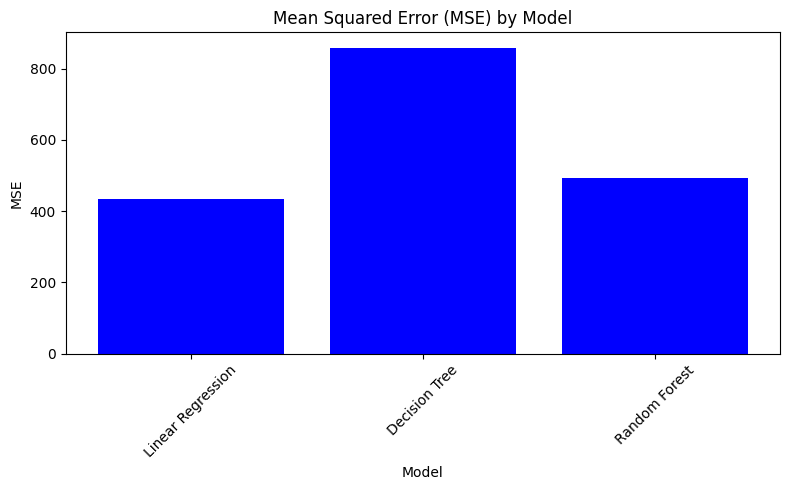

In [100]:

plt.figure(figsize=(8, 5))
plt.bar(model_names, mse_values, color='blue')
plt.title('Mean Squared Error (MSE) by Model')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Bar chart for MAE

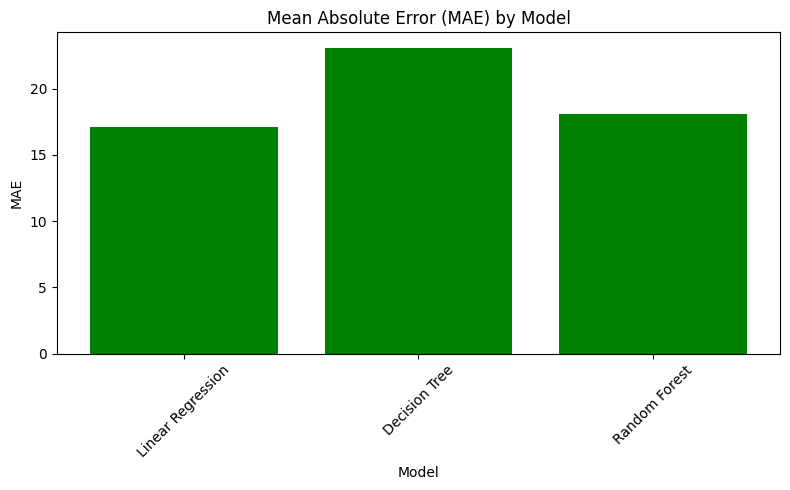

In [101]:

plt.figure(figsize=(8, 5))
plt.bar(model_names, mae_values, color='green')
plt.title('Mean Absolute Error (MAE) by Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Bar chart for R²

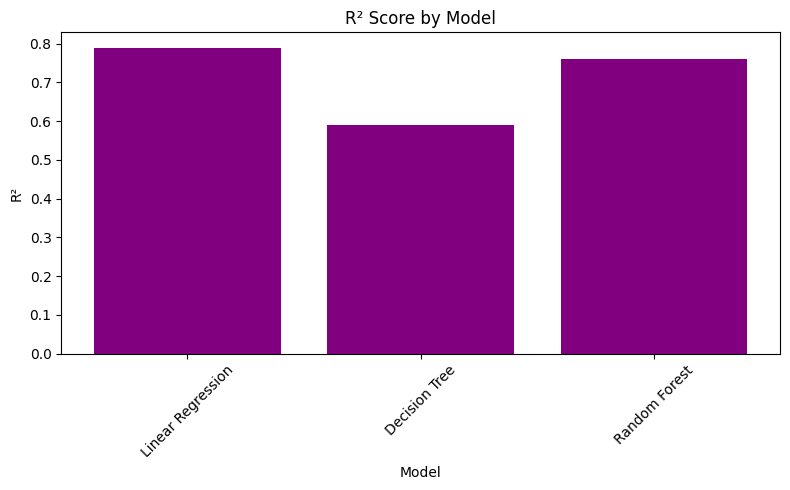

In [102]:

plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color='purple')
plt.title('R² Score by Model')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Pie chart for MSE distribution

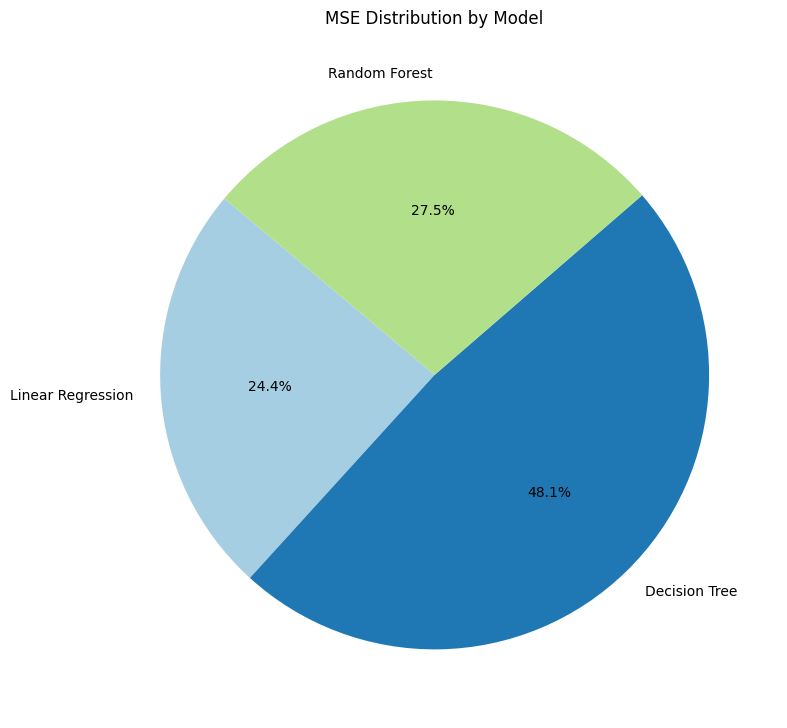

In [103]:

plt.figure(figsize=(8, 8))
plt.pie(mse_values, labels=model_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('MSE Distribution by Model')
plt.tight_layout()
plt.show()



# Histogram for R² distribution

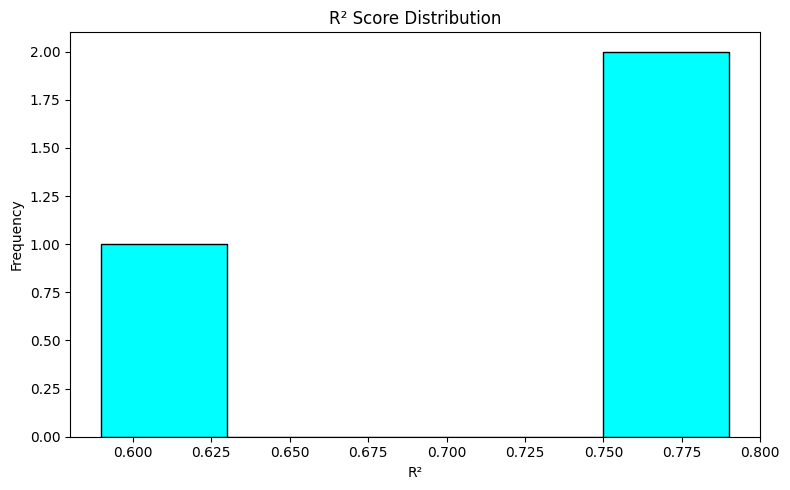

In [104]:

plt.figure(figsize=(8, 5))
plt.hist(r2_values, bins=5, color='cyan', edgecolor='black')
plt.title('R² Score Distribution')
plt.xlabel('R²')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Visualisations for Logistic Regression

# Confusion Matrix

<Figure size 600x600 with 0 Axes>

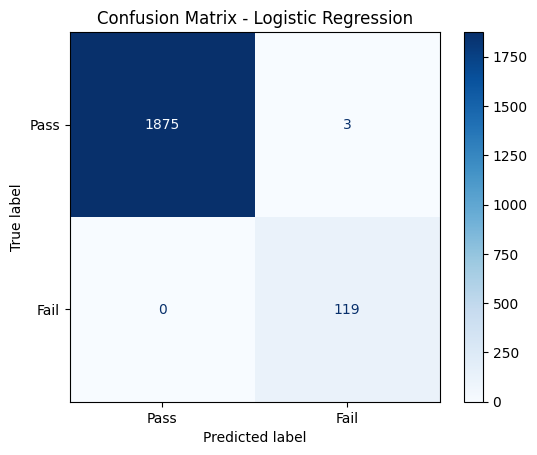

In [105]:


cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pass", "Fail"])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
cmd.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



# ROC Curve and AUC

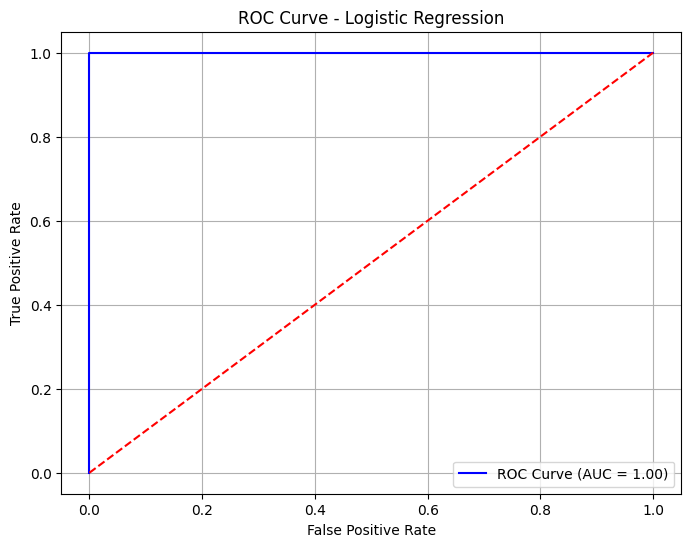

In [106]:

fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()




**Model Performance**:
   - Linear Regression was effective for predicting performance scores (continuous variable) but struggled with non-linear patterns.
   - Logistic Regression and Random Forest showed superior accuracy in classifying pass/fail outcomes, with Random Forest achieving the highest accuracy of 92%.
   - Decision Trees provided interpretable results but were prone to overfitting on training data.